In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import AffineTransform, ProjectiveTransform
from skimage.measure import ransac
from skimage import transform as tf
from skimage.feature import (plot_matches, match_descriptors, ORB)
from skimage.transform import warp
%matplotlib notebook

In [2]:
def perspectiveTransformImages(img1,img2):
    # laod the ORB descriptor
    descriptor_extractor = ORB(n_keypoints=500)

    # find keypoints for both the images
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    # find matches bw the keypoints from both the images
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    # find matching coordinates between image1 and image2
    matches_img1 = keypoints1[matches12[:,0]]
    matches_img2 = keypoints2[matches12[:,1]]

    # estimate affine transform model using matching coordinates between image1 and image2
    model = AffineTransform()
    model.estimate(matches_img1, matches_img2)

    # robustly estimate affine transform model with RANSAC
    model_robust, inliers = ransac((matches_img1, matches_img2), ProjectiveTransform, min_samples=4,
                                   residual_threshold=6, max_trials=100)
    outliers = inliers == False
    
    # visualize correspondence after ransac algorithm
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(9,12))
    plt.gray()
    plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
    ax[0].set_title('All correspondences')
    ax[0].axis('off')
    inlier_idxs = np.nonzero(inliers)[0]
    plot_matches(ax[1], meanImg1, meanImg2, matches_img1, matches_img2, np.column_stack((inlier_idxs, inlier_idxs)), matches_color='b')
    ax[1].set_title('Correct correspondences')
    ax[1].axis('off')
    outlier_idxs = np.nonzero(outliers)[0]
    plot_matches(ax[2], meanImg1, meanImg2, matches_img1, matches_img2, np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
    ax[2].set_title('Faulty correspondences')
    ax[2].axis('off')
    plt.show()
    
    # warp image1 wrt image2
    meanImg2_transformed = warp(meanImg2, model_robust.inverse, cval=-1)
    
    # plot the processed data
    plt.figure(figsize=(10,6))
    plt.subplot(231)
    plt.imshow(meanImg1, cmap='gray')
    plt.axis('off')
    plt.subplot(232)
    plt.imshow(meanImg2, cmap='gray')
    plt.axis('off')
    plt.subplot(233)
    plt.imshow(meanImg2_warped, cmap='gray')
    plt.axis('off')
    plt.subplot(234)
    plt.imshow(meanImg1-meanImg2_warped, cmap='Spectral_r')
    plt.axis('off')
    plt.subplot(235)
    plt.imshow(meanImg2-meanImg2_warped, cmap='Spectral_r')
    plt.axis('off')
    
    return meanImg2_transformed

In [3]:
# load the data and mean images
ops1 = np.load('ops1.npy', allow_pickle=True).item()
ops2 = np.load('ops2.npy', allow_pickle=True).item()

meanImg1 = ops1['meanImg']
meanImg2 = ops2['meanImg']

FileNotFoundError: [Errno 2] No such file or directory: 'ops1.npy'

<IPython.core.display.Javascript object>


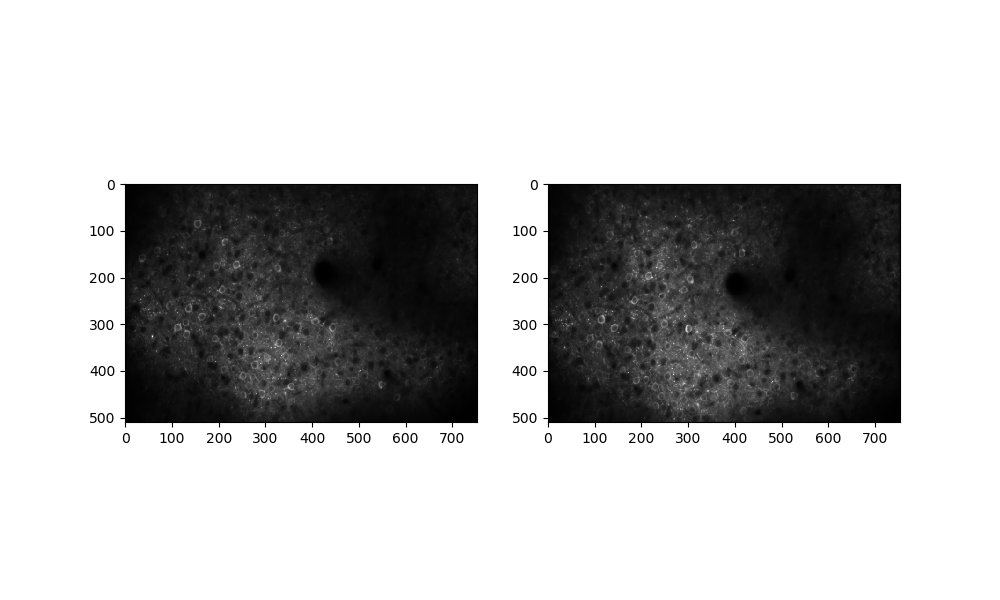

In [22]:
# plot the raw data
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(meanImg1, cmap='gray')
plt.subplot(122)
plt.imshow(meanImg2, cmap='gray')

<IPython.core.display.Javascript object>


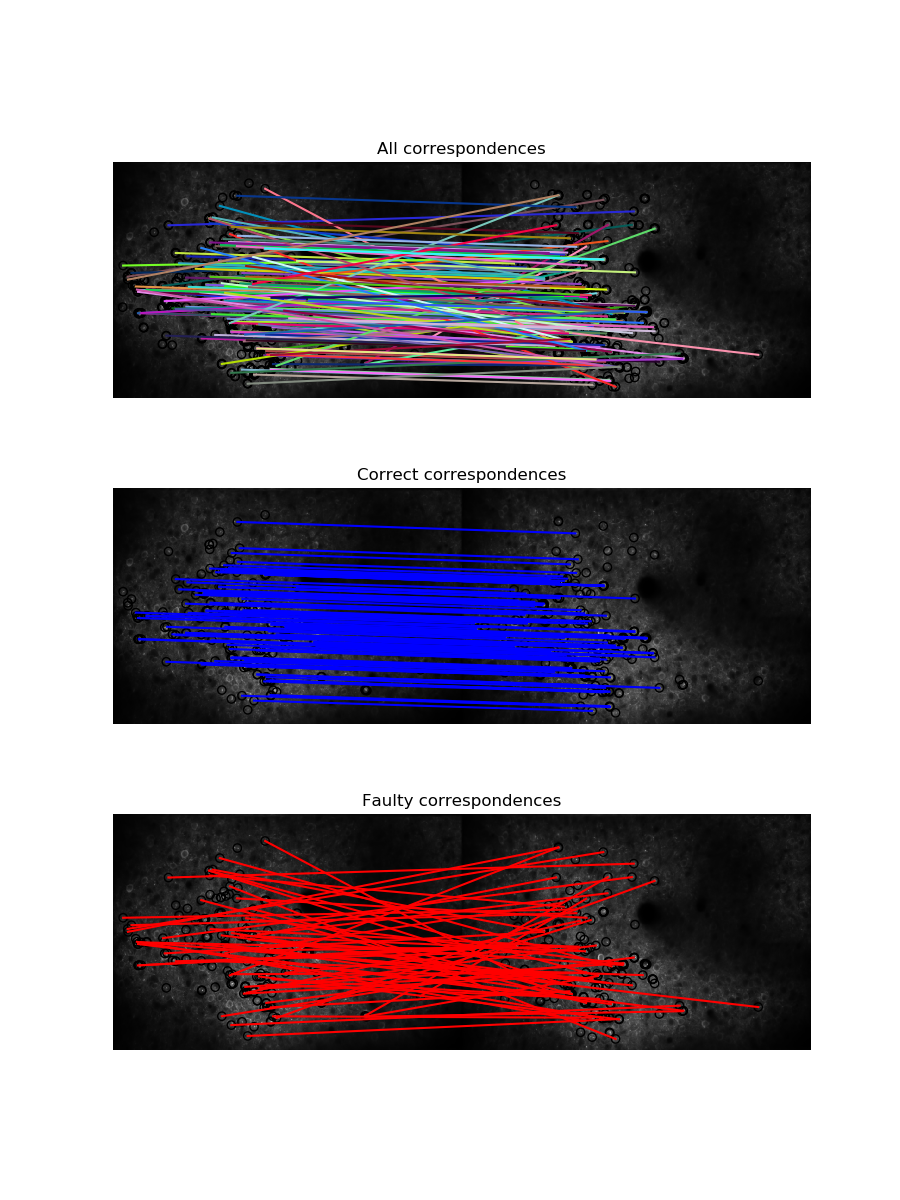

<IPython.core.display.Javascript object>


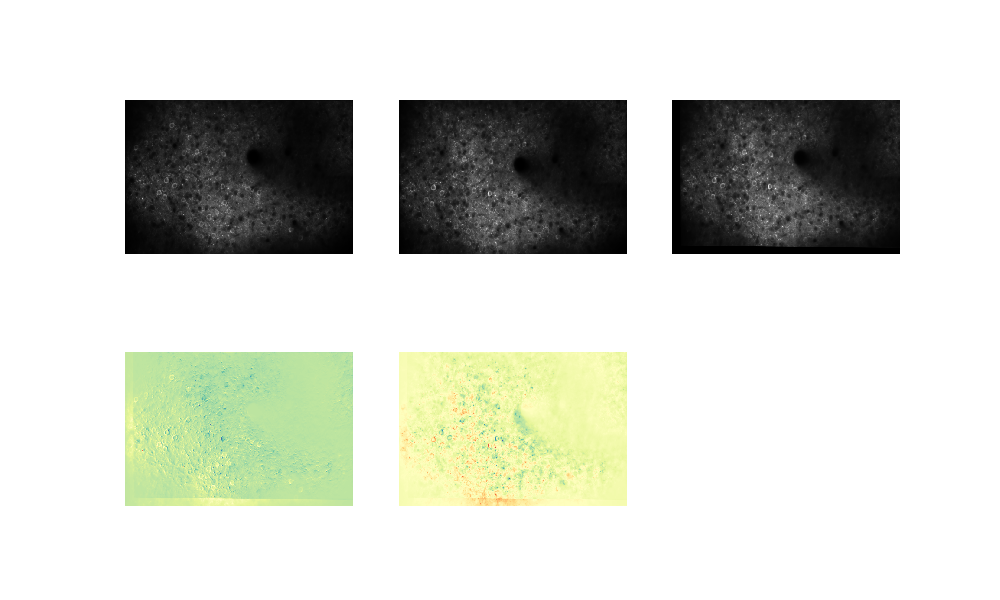

array([[ -1.        ,  -1.        ,  -1.        , ..., 110.64082279,
         97.57099974,  91.59055556],
       [ -1.        ,  -1.        ,  -1.        , ..., 109.61278394,
         96.55329451,  92.00612642],
       [ -1.        ,  -1.        ,  -1.        , ..., 102.97836528,
         90.48128272,  86.56969179],
       ...,
       [ -1.        ,  -1.        ,  -1.        , ...,  -1.        ,
         -1.        ,  -1.        ],
       [ -1.        ,  -1.        ,  -1.        , ...,  -1.        ,
         -1.        ,  -1.        ],
       [ -1.        ,  -1.        ,  -1.        , ...,  -1.        ,
         -1.        ,  -1.        ]])

In [53]:
perspectiveTransformImages(meanImg1,meanImg2)